<a href="https://colab.research.google.com/github/Ramaseshanr/ANLP/blob/master/CosDistance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

      D0    D1    D2    D3    D4    D5    D6    D7    D8    D9   D10
0    0.0  26.7  90.0  48.4  47.5  48.2  42.6  58.0  45.8  65.3  62.6
1   26.7   0.0  90.0  46.9  54.5  66.0  42.3  67.3  47.0  73.7  59.0
2   90.0  90.0   0.0  56.5  55.0  71.8  59.5  81.4  64.8  41.7  61.7
3   48.4  46.9  56.5   0.0  24.4  46.6  28.5  58.5  38.3  45.2  49.7
4   47.5  54.5  55.0  24.4   0.0  33.7  37.6  46.9  37.1  25.9  39.3
5   48.2  66.0  71.8  46.6  33.7   0.0  58.1  54.3  57.9  40.5  61.2
6   42.6  42.3  59.5  28.5  37.6  58.1   0.0  63.0  41.1  53.5  50.5
7   58.0  67.3  81.4  58.5  46.9  54.3  63.0   0.0  34.9  51.1  69.1
8   45.8  47.0  64.8  38.3  37.1  57.9  41.1  34.9   0.0  47.2  61.5
9   65.3  73.7  41.7  45.2  25.9  40.5  53.5  51.1  47.2   0.0  44.5
10  62.6  59.0  61.7  49.7  39.3  61.2  50.5  69.1  61.5  44.5   0.0


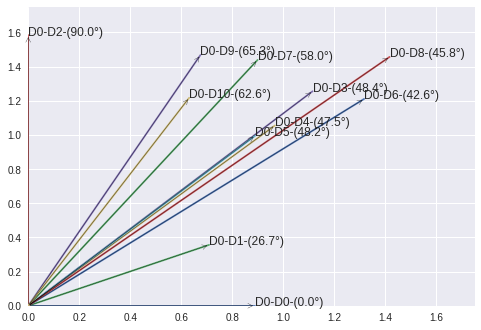

In [83]:
from numpy import *
from numpy import dot
from numpy.linalg import norm
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
from matplotlib.patches import Arc

def find_end_points(point, angle, length):
    ''' 
    #Source - https://stackoverflow.com/questions/28417604/plotting-a-line-from-a-coordinate-with-and-angle
    #
    point - Tuple (x, y)
    angle - Angle you want your end point at in degrees.
    length - Length of the line you want to plot.

    Will plot the line on a 10 x 10 plot.
    '''

    # unpack the first point
    x, y = point

    # find the end point
    endy = length * math.sin(math.radians(angle))
    endx = length * math.cos(math.radians(angle))

    # plot the points
    #fig = plt.figure()
    #ax = plt.subplot(111)

    return ([x,endx],[y,endy])
    #ax.plot([x, endx], [y, endy])
    

    #return fig

doc_term = array([
    [0.1, 0.1, 0.0, 0.1, 0.2, 0.0, 0.1, 0.9, 0.9, 0.3, 0.0, 0.8],
    [0.1, 0.1, 0.0, 0.1, 0.2, 0.0, 0.1, 0.9, 0.9, 0.3, 0.0, 0.8],
    [0.0, 0.0, 0.9, 0.2, 0.3, 0.1, 0.7, 0.0, 0.2, 0.7, 0.5, 0.5],
    [0.0, 0.0, 0.9, 0.9, 0.5, 0.1, 0.9, 0.3, 0.8, 0.4, 0.1, 0.4],
    [0.4, 0.0, 0.0, 0.2, 0.5, 0.9, 0.3, 0.7, 0.4, 0.6, 0.0, 0.3],
    [0.6, 0.6, 0.0, 0.7, 0.3, 0.3, 0.9, 0.1, 0.9, 0.0, 0.0, 0.3],
    [0.0, 0.0, 0.8, 0.6, 0.6, 0.6, 0.0, 0.1, 0.4, 0.9, 0.3, 0.1],
    [0.4, 0.4, 0.0, 0.5, 0.5, 0.1, 0.7, 0.1, 0.5, 0.3, 0.8, 0.1],
    [0.3, 0.3, 0.0, 0.9, 0.8, 0.7, 0.7, 0.8, 0.6, 0.6, 0.8, 0.0],
    [0.0, 0.0, 0.5, 0.0, 0.2, 0.0, 0.0, 0.1, 0.3, 0.4, 0.5, 0.3]
])

cos_list = []
pd_cols = []
header = ['D0','D1','D2','D3','D4','D5','D6','D7','D8','D9','D10']
for i in range(0,11):
    for j in range(0,11):
        cos_value = dot(transpose(doc_term[:, [i]]), doc_term[:, [j]]) / (norm(doc_term[:, [j]]) * norm(doc_term[:, [i]])).tolist()
        cos_list.append( asscalar( around(math.degrees(math.acos(min(max(cos_value,-1.0),1.0))), decimals=1) ))
    pd_cols.append(cos_list)
    cos_list = []
df = pd.DataFrame(pd_cols, columns=header)
print(df)
fig = plt.figure()
ax = plt.subplot(111)
ax.set_ylim([0, 1.75])  # set the bounds to be 10, 10
ax.set_xlim([0, 1.75])

ref_doc = 0
for i in range (0,11):
    X, Y = find_end_points([0, 0], df.iloc[ref_doc][i], norm(doc_term[:, [i]]))
    ax.plot(X,Y)
    ax.annotate("", xy=(X[1],Y[1]), xytext=(0, 0),arrowprops=dict(arrowstyle="->"))    
    ax.text(X[1],Y[1],"D" + str(ref_doc) + "-"+"D"+str(i)+"-("+str(df.iloc[ref_doc][i]) +u"\u00b0"+")")
    #ax.add_patch(Arc((0,0), .25+i/12.0, .25+i/12.0, theta1=0.0, theta2=df.iloc[0][i], edgecolor='r', lw=1.5, label = str(df.iloc[0][i])+u"\u00b0"))
fig.show()